# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

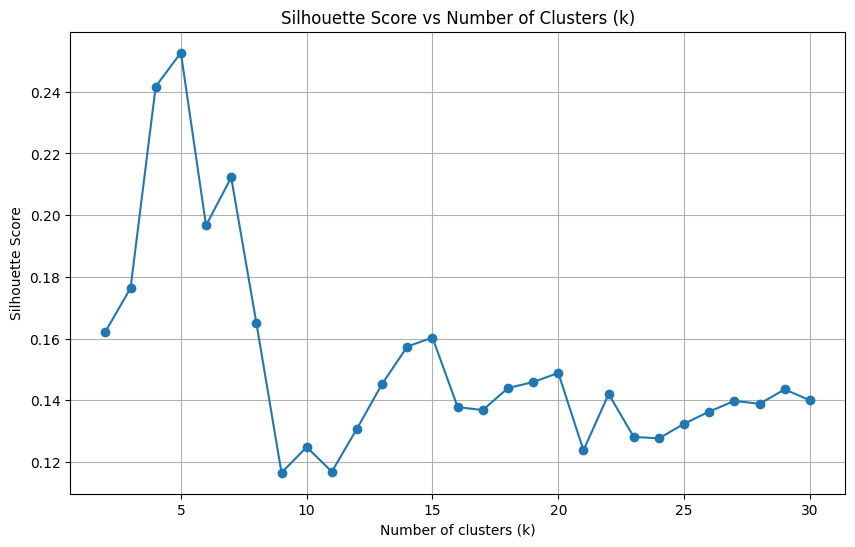

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv('./agaricus-lepiota.csv')

mushrooms_dummy = pd.get_dummies(df.drop('edibility', axis=1))
# Step 1: Apply k-means for k in the range of 2 to 30 and calculate the silhouette score
k_values = range(2, 31)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(mushrooms_dummy)
    silhouette_avg = silhouette_score(mushrooms_dummy, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

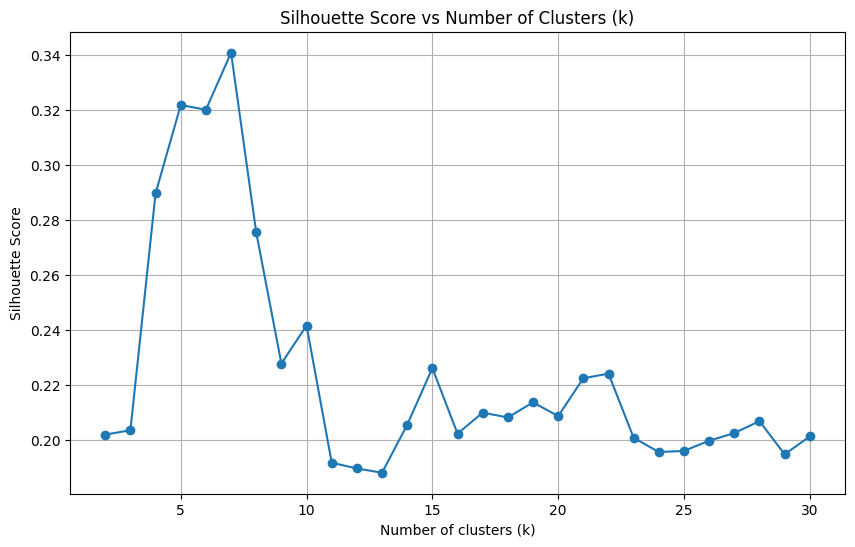

In [21]:
# Do the same thing with by reducing features to 20 components 
pca = PCA(n_components=20, random_state=42)
mushrooms_pca = pca.fit_transform(mushrooms_dummy)

k_values = range(2, 31)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(mushrooms_pca)
    silhouette_avg = silhouette_score(mushrooms_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

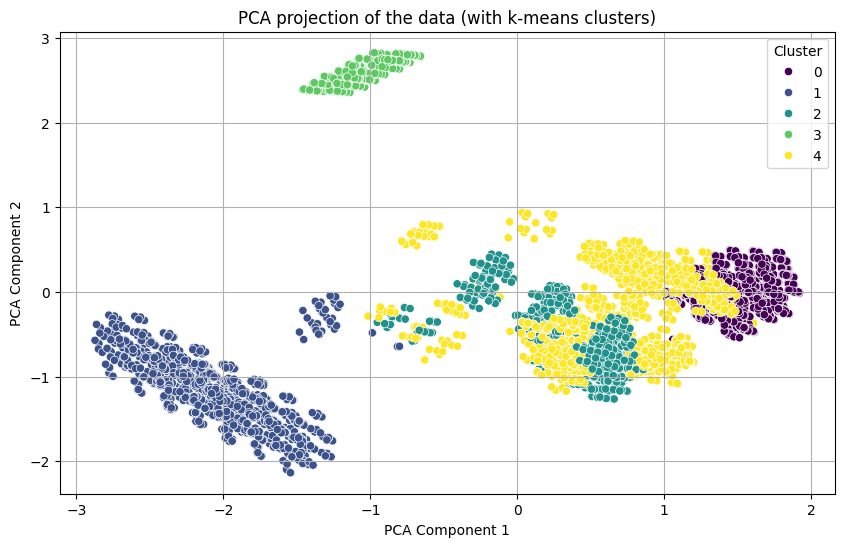

In [22]:
# 2D

# Determine the optimal number of clusters from Task 1 (let's assume optimal_k is the result)
optimal_k = 5

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(mushrooms_dummy)

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
mushrooms_pca = pca.fit_transform(mushrooms_dummy)

# Visualize the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mushrooms_pca[:, 0], y=mushrooms_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title('PCA projection of the data (with k-means clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

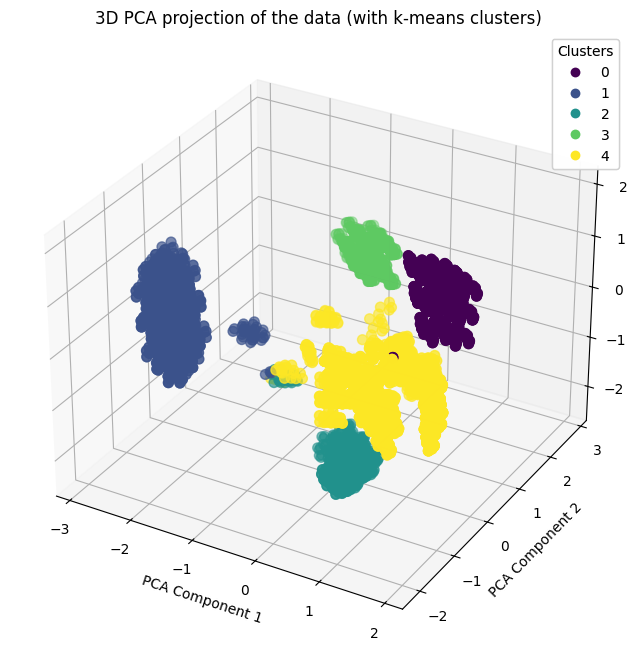

In [23]:
# 3D

#  Determine the optimal number of clusters from Task 1 (let's assume optimal_k is the result)
optimal_k = 5

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(mushrooms_dummy)

# Apply PCA to reduce the data to 3 dimensions for 3D visualization
pca = PCA(n_components=3, random_state=42)
mushrooms_pca_3d = pca.fit_transform(mushrooms_dummy)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point with color representing its cluster
scatter = ax.scatter(mushrooms_pca_3d[:, 0], mushrooms_pca_3d[:, 1], mushrooms_pca_3d[:, 2], 
                     c=cluster_labels, cmap='viridis', s=50)

# Add labels and title
ax.set_title('3D PCA projection of the data (with k-means clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()